<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="https://www.tecazuay.edu.ec/wp-content/uploads/2023/07/LOGO-RECTANGULAR_SIN-FONDO-2048x626.png" alt="Logo TECAZUAY" width="100%" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Herramientas de Visualización de Datos</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>CICLO: M3A</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Verónica Chimbo <span style="margin-left: 30px;"></span></div>
        </div>
        <div style="text-align:right;">Carrera: TECNOLOGÍA SUPERIOR EN BIG DATA <span style="margin-left: 30px;"></span></div>
         <div style="text-align:right;">Estudiante: Victor Cabrera <span style="margin-left: 30px;"></span></div>
          <div style="text-align:right;">Fecha: 24/06/2024   <span style="margin-left: 30px;"></span></div>
        </div>
    </div>
</div>
<!--/Header-->

## Introducción

La visualización de datos es una parte imprescindible en la minería de datos. Lo primero que hacemos cuando nos enfrentamos a un nuevo conjunto de datos es el análisis exploratorio que nos permite conocer mejor nuestros datos. En esta fase, ser capaces de crear visualizaciones ayuda notablemente a entender la estructura y ver más claras las relaciones entre las variables, sobretodo cuando nos enfrentamos a _datasets_ grandes o con una alta dimensionalidad.

Podemos ver el análisis visual de los datos incluido en un proceso contínuo de _feedback_ entre la visualización y la construcción de modelos estadísticos, como nos propone Keim (diagrama). Un modelo estadístico más adecuado nos permite crear mejores visualizaciones que a la vez, nos darán pistas para construir modelos más complejos y detallados.

![](images/keim.png)

En esta actividad presentaremos algunas de las librerías más usadas en `Python` para generar visualizaciones y mostraremos ejemplos de cómo generar los gráficos más habituales.

## Librerías de visualización de datos

### Matplotlib

[`Matplotlib`](https://matplotlib.org/) es la librería de visualización de datos más popular, y permite crear visualizaciones de una forma bastante fácil.

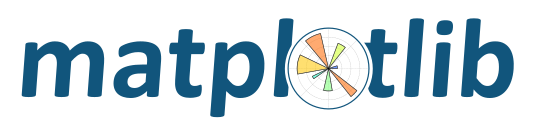

### Seaborn

[`Seaborn`](https://seaborn.pydata.org/) es una librería basada en `Matplotlib` que está enfocada en la visualización de modelos estadíticos. `Seaborn` no pretende substituir `Matplotlib`, sinó complementarla para poder hacer visualizaciones más complejas con una programación de alto nivel y con menos esfuerzo.

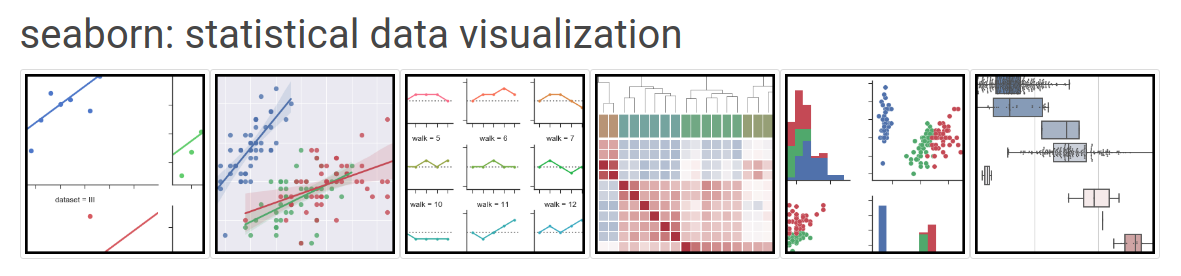

### Bokeh

[`Bokeh`](https://bokeh.pydata.org/en/latest/) es otra librería de visualización de datos enfocada a las visualizaciones interactivas. A diferencia de `Seaborn`, `Bokeh` és independiente de `Matplotlib`. El principal foco de `Bokeh` es la interacción en el web en el estilo de los documentos centrados en datos [D3.js Data-Driven Documents](https://d3js.org/).

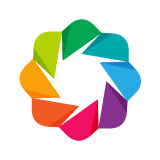![Bokeh](images/bokeh.png)

## _House prices dataset_

El conjunto de datos que usaremos en esta actividad corresponde al _dataset_ [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) que es una de las competiciones de iniciación de [Kaggle](www.kaggle.com).

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('/content/train.csv')

## Visualizaciones más comunes

A continuación veremos algunas de les visualizaciones más comunes y cómo implementarlas en alguna de las tres librerías que hemos presentado antes.

### Diagrama de barras

El diagrama de barras es una de las visualizaciones más comunes. Nos muestra la relación entre una variable numérica y otra de categórica. Por ejemplo, podemos mostrar la relación entre el número de baños de una vivenda y el precio de venda medio.

En este ejemplo, primero calcularemos el precio medio de venta por número de baños y después usaremos la función `plot` de `Matplotlib` para visualizarla.

<Axes: xlabel='FullBath'>

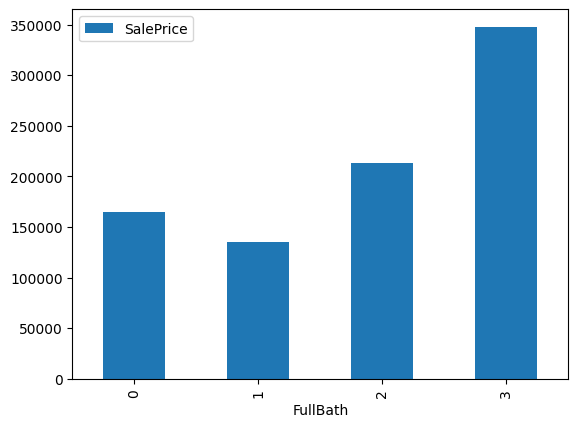

In [3]:
pivot = df_train.pivot_table(index='FullBath', values='SalePrice', aggfunc=np.mean)
pivot.plot(kind='bar')

### Histograma y diagrama de densidad

#### Histograma

Un histograma nos permite representar gráficamente la distribución de una variable numérica. La variable se divide en diferentes particiones o _bins_ que representan un rango de valores de la variable. Para cada partición se representa el número de observaciones en aquel rango de valores. La forma del histograma puede canviar considerablemente dependiendo del número de particiones que definamos.

A continuación mostraremos la distribución de la variable `SalePrice` con diferentes números de particiones. Usaremos la función `distplot` de la librería `Seaborn`.

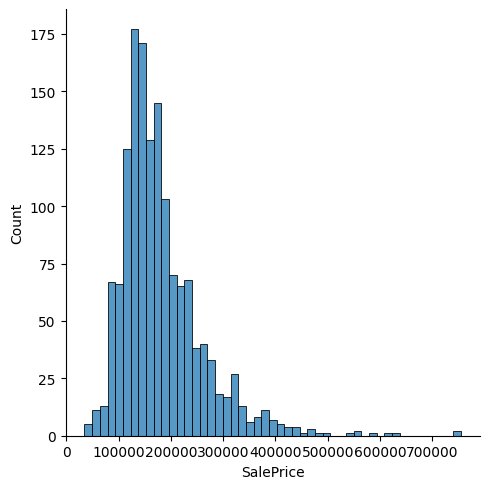

In [4]:
sns.displot(df_train["SalePrice"])

Canviamos el nombre de particiones a 100:

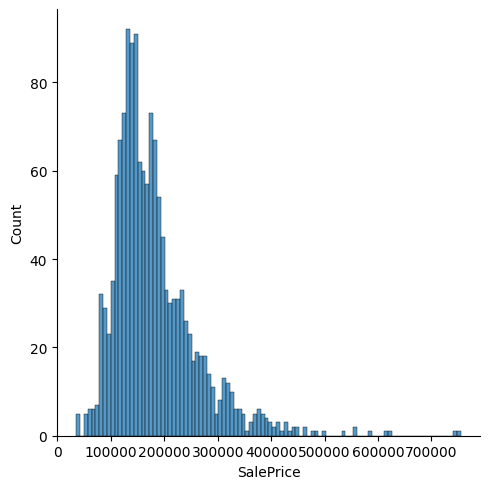

In [5]:
sns.displot(df_train["SalePrice"], bins=100)

Y ahora con sólo 10:

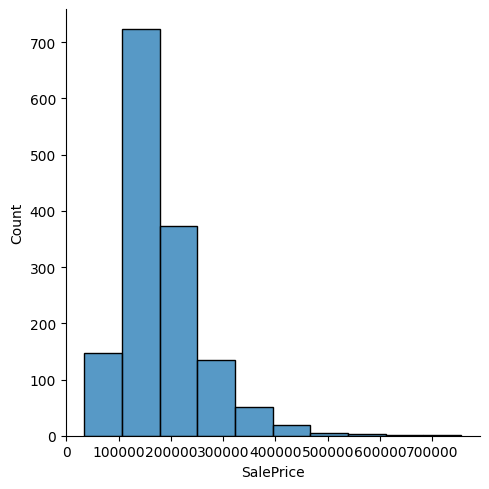

In [6]:
sns.displot(df_train["SalePrice"], bins=10)

#### Diagrama de densidad

El diagrama de densidad también muestra la distribución de una variable numérica, y es muy parecido al histograma. El diagrama de densidad es una curva que suaviza la discontinuidad de las particiones del histograma y tiene un parámetre _bandwidth_ (`bw`) para controlar de qué manera se adapta a los datos.

<Axes: xlabel='SalePrice', ylabel='Density'>

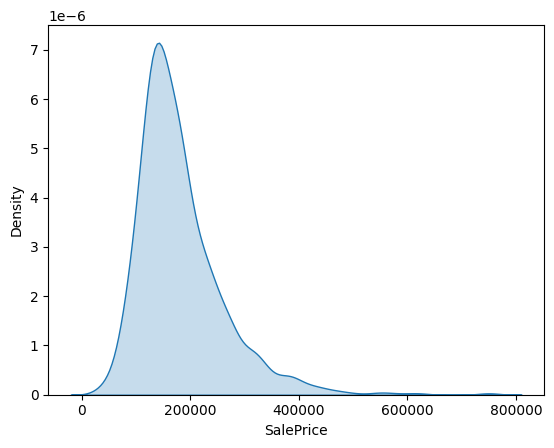

In [7]:
sns.kdeplot(df_train["SalePrice"], fill=True)

El valor per defecto intenta hacer una buena adaptación pero puede ser útil probar otros valores.

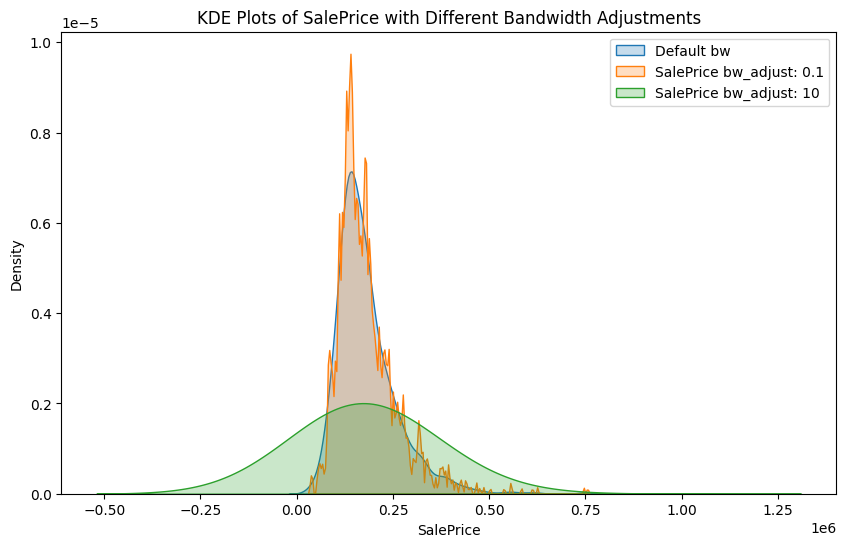

In [8]:
# Updated KDE plots with different bandwidth adjustments
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train["SalePrice"], fill=True, label="Default bw")
sns.kdeplot(df_train["SalePrice"], fill=True, bw_adjust=0.1, label="SalePrice bw_adjust: 0.1")
sns.kdeplot(df_train["SalePrice"], fill=True, bw_adjust=10, label="SalePrice bw_adjust: 10")

# Add legend
plt.legend()
plt.title("KDE Plots of SalePrice with Different Bandwidth Adjustments")
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.show()

### Diagrama de cajas y de violín

El diagrama de cajas nos da un sumario gráfico de una o varias variables. La línia que divide la caja en dos mitades representa el valor de la mediana de los datos. Los extremos de la caja muestras los cuartiles inferiores y superiores y las línias extremas los valores máximos y mínimos excluyendo los _outliers_. El diagrama de cajas pero, esconde parte de la información, como la distribución de los valores de la variable o el número de observaciones.

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

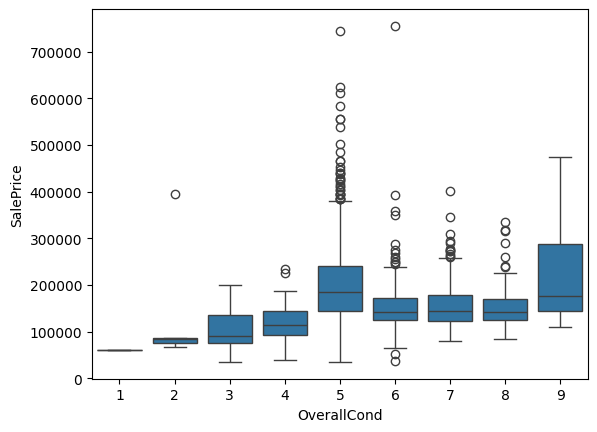

In [9]:
sns.boxplot(x=df_train["OverallCond"], y=df_train["SalePrice"])

Podemos añadirle el detalle de las observaciones o _jitter_ con la función `swarmplot` de `Seaborn`.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.6% of the points cannot be plac

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 80.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.6% of the points cannot be plac

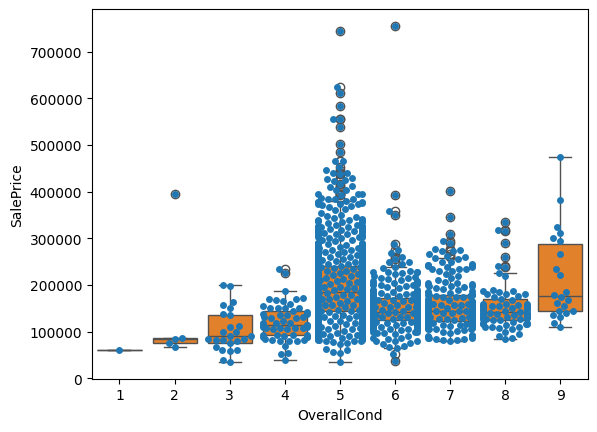

In [10]:
sns.swarmplot(x=df_train["OverallCond"], y=df_train["SalePrice"])
sns.boxplot(x=df_train["OverallCond"], y=df_train["SalePrice"])

En nuestro caso tenemos un número grande de observaciones y probablemente es mejor usar el diagrama de violín para ver la distribución de las variables.

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

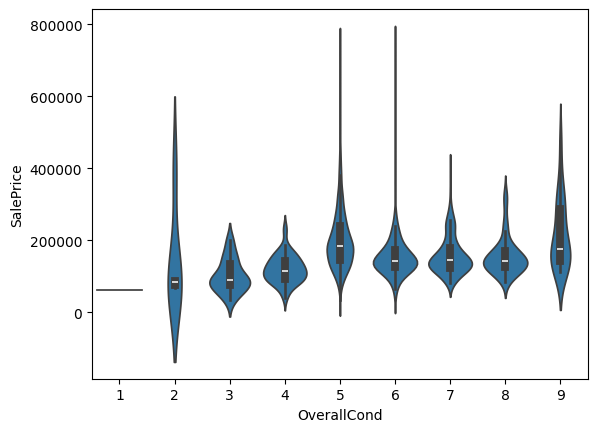

In [11]:
sns.violinplot(x=df_train["OverallCond"], y=df_train["SalePrice"])

### Diagrama de dispersión

El diagrama de dispersión muestra la relación de dos variables en dos dimensiones. Cada punto representa una observación, y la posición en los ejes horitzontal y vertical representa el valor de las dos variables para aquella observación. Es un diagrama muy útil para estudiar la relación entre dos variables.

Mostramos la relación entre el precio de venda y los metros cuadrados de una vivienda. Como es de esperar, vemos una clara correlación entre las dos variables.

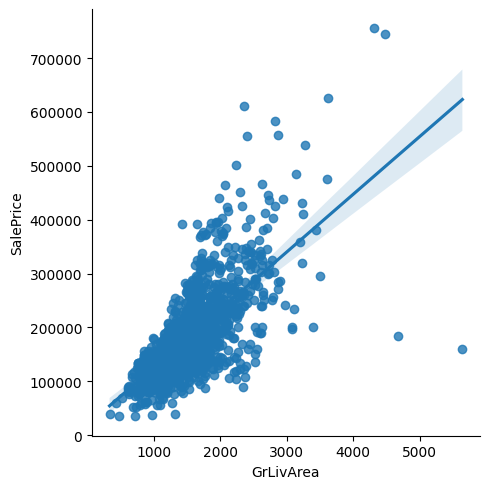

In [12]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=df_train, fit_reg=True, legend=False)

Podemos añadirle una tercera dimensión usando colores para codificar otra variable. En este caso, añadiremos la variable categórica `OverallQual` que corresponde a la calificación del habitaje y la mostraremos con un código de colores.

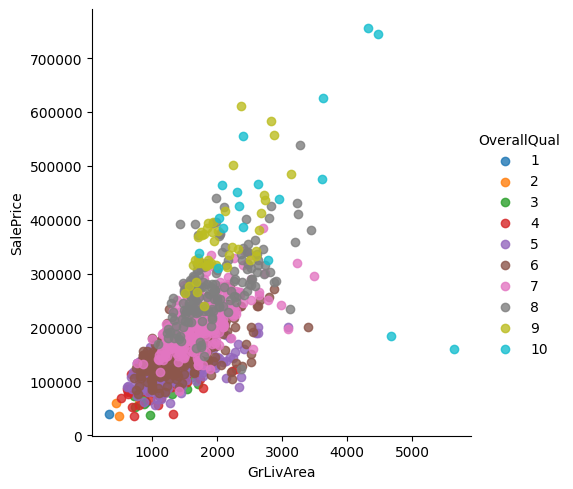

In [13]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=df_train, fit_reg=False, hue="OverallQual", legend=True)

La librería `Seaborn` nos permite crear visualizaciones más complejas, y añadirle un histograma para cada eje. A la vez, nos calcula el coeficiente de correlació de Pearson y el p-valor de la medida de correlación.

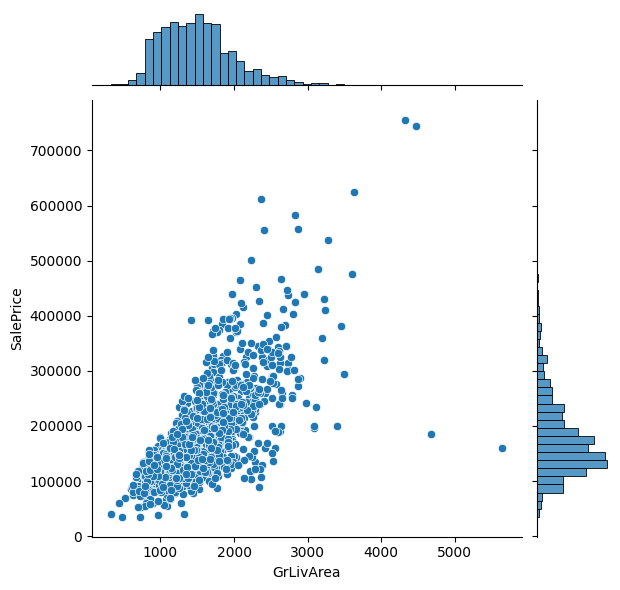

In [14]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=df_train, kind='scatter')

Si el hecho de tener muchas observaciones nos esconde la densidad de éstas, podemos usar un `hexbin plot`, que nos divide la cuadrícula en hexágonos y nos codifica con un color más intenso donde tenemos más densidad de observaciones.

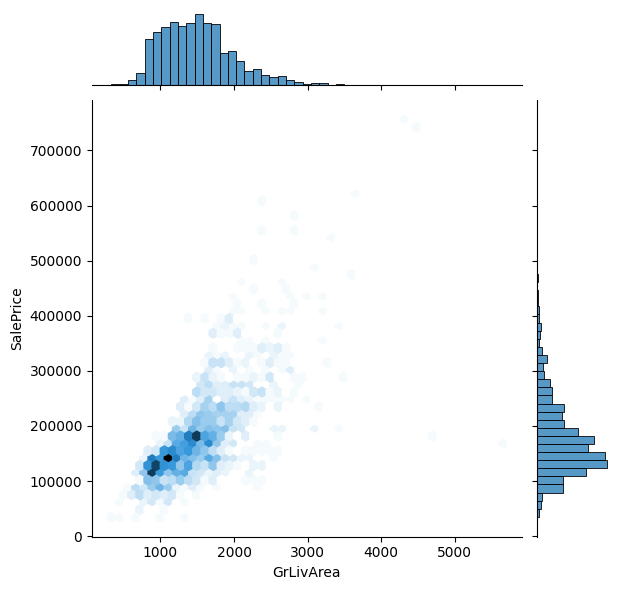

In [15]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=df_train, kind='hex')

### Mapa de calor

El mapa de calor es una representación gráfica de los datos donde los valors de una matriz són representados con colores. Es útil para representar visualmente una matriz numérica de datos.

En el siguiente ejemplo, calcularemos la correlación entre diversas variables del conjunto de datos y la mostraremos visualmente con un mapa de calor.

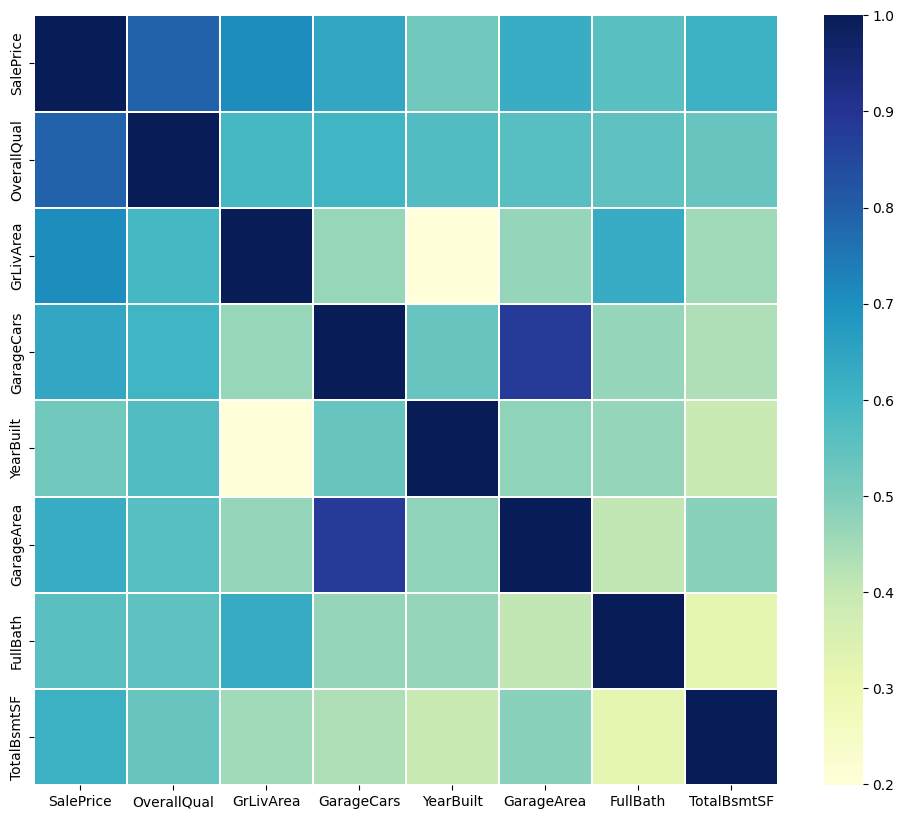

In [16]:
# Assuming df_train is already defined and contains the necessary columns

# Select only numeric columns
df_numeric = df_train.select_dtypes(include=[np.number])

# Compute the Spearman correlation matrix
corrmat = df_numeric.corr(method='spearman')

# Number of variables for heatmap
k = 8

# Get the top k variables most correlated with 'SalePrice'
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

# Compute the correlation coefficient matrix for the selected variables
cm = np.corrcoef(df_numeric[cols].values.T)

# Plot the heatmap
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

# Show the plot
plt.show()

Mapa de texto

In [17]:
# Instalar las bibliotecas necesarias
!pip install wordcloud matplotlib


In [18]:
# Importar las bibliotecas
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
# Definir el texto
text = """
La representación visual de datos es clave para analizar y comunicar información compleja, convirtiendo datos numéricos y estadísticos
en formas visuales que facilitan la comprensión de patrones y tendencias. Utiliza diversos gráficos como barras, líneas y mapas,
seleccionados según los datos y la narrativa deseada. Herramientas como matplotlib, seaborn y plotly permiten crear gráficos personalizados
e interactivos, ampliamente usados en ciencia de datos, investigación, marketing y negocios. Interpretar estas visualizaciones es
una habilidad valiosa para comunicar hallazgos y respaldar decisiones basadas en datos.
"""


In [23]:
# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

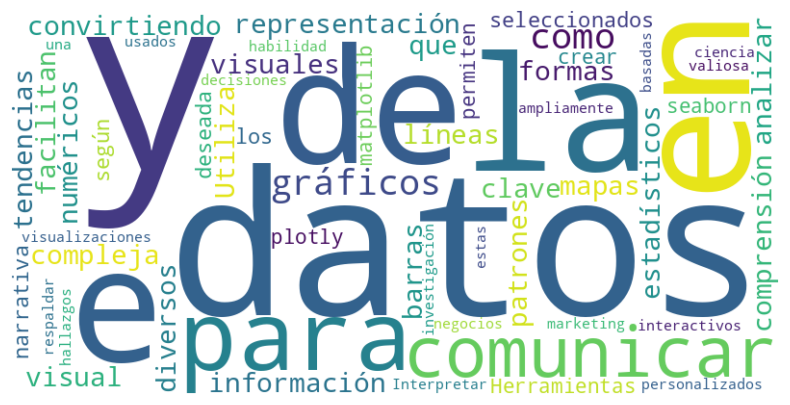

In [24]:
# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conclusión


En esta actividad hemos explorado algunas de las visualizaciones más utilizadas y ejemplos de cómo implementarlas utilizando las librerías Matplotlib y Seaborn. La clave para una visualización efectiva de datos es entender qué tipo de gráfico seleccionar y por qué, en función de la naturaleza de los datos, y luego elegir la herramienta adecuada para llevarlo a cabo.

## Bibliografía

Keim, D. A., Mansmann, F., Schneidewind, J., Thomas, J., & Ziegler, H. (2008). Visual analytics: Scope and challenges. In Visual data mining (pp. 76-90). Springer, Berlin, Heidelberg.

Minguillón, J. (2017). Anàlisi visual de dades: conceptes bàsics i eines. Item: revista de biblioteconomia i documentació, 2(63).